In [1]:
# Importing the libraries we will use
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df=pd.read_csv('/content/covid_vaccine_clean.csv')
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')#unifying column names
df.drop(['unnamed:_0'], axis=1, inplace=True)#dropping unwanted column
df.head()

healthcare_worker  ...  vaccine_launch_pre_post
0                0.0  ...                       No
1                1.0  ...                       No
2                1.0  ...                       No
3                1.0  ...                       No
4                1.0  ...                       No

[5 rows x 89 columns]

# **Bivariate Analysis**

In [5]:
def str_categorize(df, column, replace, replace_with):
  df[column].replace(to_replace=replace, value=replace_with, inplace=True)
  return df.head()

In [6]:
str_categorize(df, 'covid_vaccine', [0,1], ['no', 'yes'])
str_categorize(df, 'your_age', [1,2,3,4,5,6], ['18-24', '25-44', '45-60', '61-70', '>70', 'prefer not to answer'])
str_categorize(df, 'your_education', [1,2,3,4,5,6,7,8,9], ['Middle school or less', 'Highschool', 'Undergraduate', 'Graduate', 'Masters', 'Doctorate', 'Professional degree', 'Other', 'Prefer not to say'])
str_categorize(df, 'financial_status', [1,2,3,4], ['Lower middle class/poor', 'Middle class', 'Upper middle class', 'Wealthy'])
str_categorize(df,'healthcare_worker',[0,1],['Healthcare workers', 'Non-Healthcare workers'])

healthcare_worker  ...  vaccine_launch_pre_post
0      Healthcare workers  ...                       No
1  Non-Healthcare workers  ...                       No
2  Non-Healthcare workers  ...                       No
3  Non-Healthcare workers  ...                       No
4  Non-Healthcare workers  ...                       No

[5 rows x 89 columns]

In [7]:
#the fuction will plot different variables to compared them with the covid_vaccine uptake i.e. whether an individual would or would not take the vaccine.
!pip install researchpy
import researchpy as rp
def visualize(column):
  crosstab=rp.crosstab(df[column],df['covid_vaccine'],prop='row')
  crosstab['covid_vaccine'][['no','yes']].drop('All')
  df3=pd.DataFrame(crosstab)
  df3.columns=['No','Yes','All']
  df3[['No','Yes']]
  df3.drop(['All'],inplace=True,axis=1)
  df3.drop(df3.index[-1])
  return df3
  #return df3[['No', 'Yes']].plot(kind = 'barh', stacked = True, figsize = (10,6),color=['yellow','grey']),plt.legend(loc= 'upper left'),plt.xlabel(f'{column}'),plt.ylabel('Uptake of Covid Vaccine'),plt.title("The inflence of"  f'{column}'  "on vaccine uptake"),plt.show()

In [8]:
visualize('census_region')

No    Yes
census_region                   
East North Central  17.89  82.11
East South Central  17.56  82.44
Mid-Atlantic        21.15  78.85
Mountain             9.73  90.27
New England         11.34  88.66
Pacific             17.25  82.75
South Atlantic      20.16  79.84
West North Central  11.67  88.33
West South Central  22.75  77.25
All                 18.14  81.86

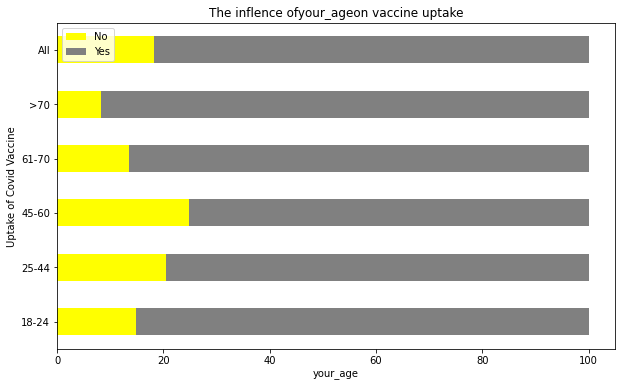

(<matplotlib.axes._subplots.AxesSubplot at 0x7f886b831f50>,
 Text(0.5, 17.200000000000003, 'your_age'),
 Text(17.199999999999996, 0.5, 'Uptake of Covid Vaccine'),
 Text(0.5, 1.0, 'The inflence ofyour_ageon vaccine uptake'),
 None)

In [ ]:
#comparing age of the respondent against whether or not they would take a vaccine
visualize('your_age')


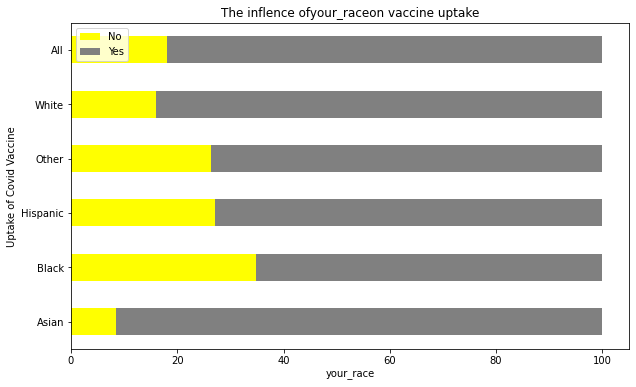

(<matplotlib.axes._subplots.AxesSubplot at 0x7f886b703950>,
 Text(0.5, 17.200000000000003, 'your_race'),
 Text(17.200000000000003, 0.5, 'Uptake of Covid Vaccine'),
 Text(0.5, 1.0, 'The inflence ofyour_raceon vaccine uptake'),
 None)

In [ ]:
#comparing race of the respondent against whether or not they would take a vaccine
visualize('your_race')


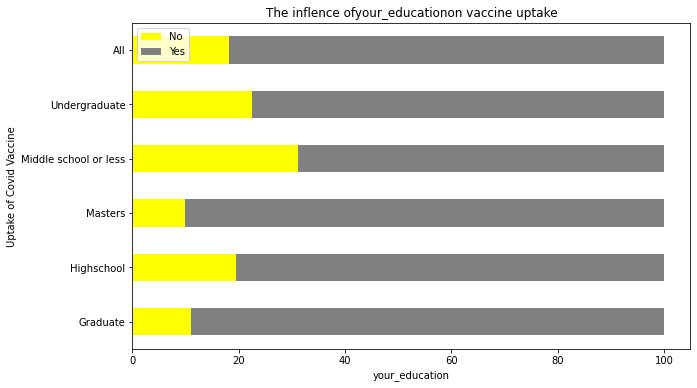

(<matplotlib.axes._subplots.AxesSubplot at 0x7f886b204550>,
 Text(0.5, 18.106250000000003, 'your_education'),
 Text(17.19999999999999, 0.5, 'Uptake of Covid Vaccine'),
 Text(0.5, 1.0, 'The inflence ofyour_educationon vaccine uptake'),
 None)

In [ ]:
#comparing level of education of the respondent against whether or not they would take a vaccine
visualize('your_education')

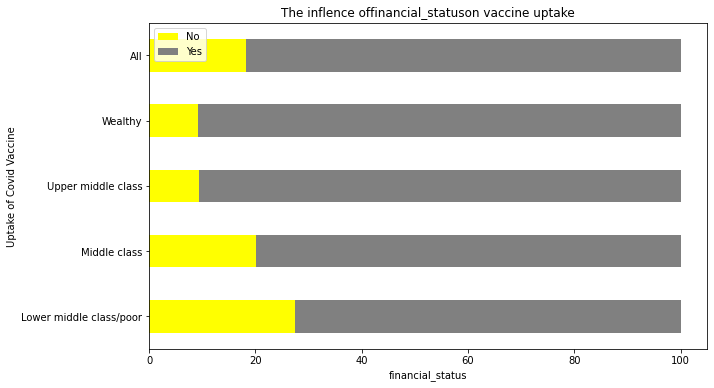

(<matplotlib.axes._subplots.AxesSubplot at 0x7f886b170c90>,
 Text(0.5, 18.106250000000003, 'financial_status'),
 Text(17.19999999999999, 0.5, 'Uptake of Covid Vaccine'),
 Text(0.5, 1.0, 'The inflence offinancial_statuson vaccine uptake'),
 None)

In [ ]:
#comparing financial of the respondent against whether or not they would take a vaccine
visualize('financial_status')

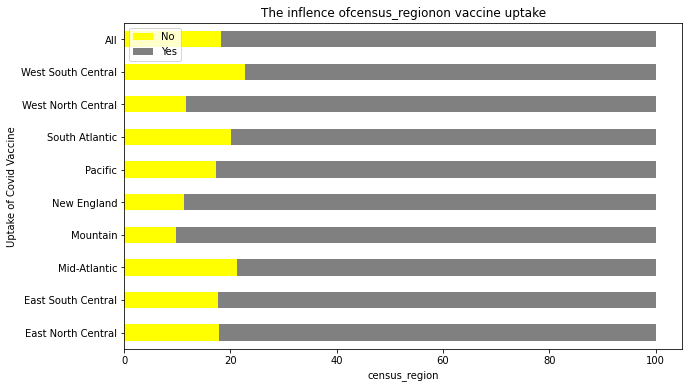

(<matplotlib.axes._subplots.AxesSubplot at 0x7f886b1f0e50>,
 Text(0.5, 18.106250000000003, 'census_region'),
 Text(17.200000000000003, 0.5, 'Uptake of Covid Vaccine'),
 Text(0.5, 1.0, 'The inflence ofcensus_regionon vaccine uptake'),
 None)

In [ ]:
#comparing different USA regions against whether or not they would take a vaccine
visualize('census_region')

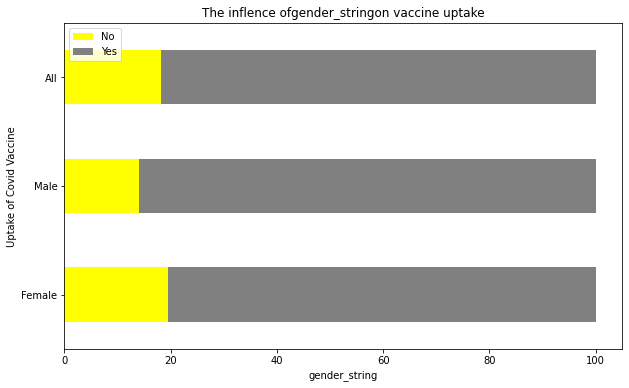

(<matplotlib.axes._subplots.AxesSubplot at 0x7f886b038050>,
 Text(0.5, 18.106250000000003, 'gender_string'),
 Text(17.200000000000003, 0.5, 'Uptake of Covid Vaccine'),
 Text(0.5, 1.0, 'The inflence ofgender_stringon vaccine uptake'),
 None)

In [ ]:
#comparing gender of the respondent against whether or not they would take a vaccine
visualize('gender_string')

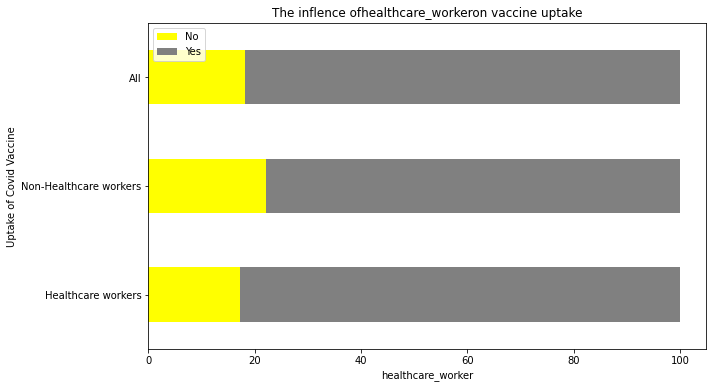

(<matplotlib.axes._subplots.AxesSubplot at 0x7f886afd0750>,
 Text(0.5, 18.106250000000003, 'healthcare_worker'),
 Text(17.19999999999999, 0.5, 'Uptake of Covid Vaccine'),
 Text(0.5, 1.0, 'The inflence ofhealthcare_workeron vaccine uptake'),
 None)

In [ ]:
#comparing whether being ahealthcare worker affects the willingness to take a covid vaccine
visualize('healthcare_worker')